# Figure6 ChromHMM Overlap vs Zinbra

In [1]:
import os

import pandas as pd
from pathlib import Path

from IPython.display import display

import downstream.bed_metrics as bm
import downstream.loci_of_interest as loi

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages

N_THREADS = 8

In [2]:
# Ensure project configured
! echo $WASHU_ROOT
! echo $PYTHONPATH

/Users/romeo/work/washu
/Users/romeo/work/washu:


In [3]:
data_root = Path("/mnt/stripe/bio/experiments/configs/Y20O20")
loi_path = data_root / "loci_of_interest"
hists = ['H3K4me1', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K36me3']

This notebook builds necessary plots from the scratch the alternative is to calculate using all loci pipeline:

```
#! python /mnt/stripe/washu/downstream/reports/loci_intersection_report.py -o /mnt/stripe/bio/experiments/aging/loci_of_interest/tuned8_plots -p 24 --skip-stats --tool zinbra
```

In [4]:
def build_overlap_metrics(result_pdf_path: Path, title,
                          a_paths, a_labels, b_paths, b_labels,
                          transpose=False,
                          figsize=(14,14)):
    
    metric_df_path = str(result_pdf_path.with_suffix(".csv"))
    result_pdf_path = str(result_pdf_path)

    print("Calculating overlap metrics:", result_pdf_path)

    if os.path.exists(metric_df_path):
        os.remove(metric_df_path)
    
    df = bm.bed_metric_table(a_paths, b_paths, jaccard=False, threads=N_THREADS)
    df.to_csv(metric_df_path)

    display(df.head())

    df.index = a_labels
    df.columns = b_labels

    if transpose:
        df = df.T
        
    with PdfPages(result_pdf_path) as pdf:
        for out in [None, pdf]:
            bm.plot_metric_heatmap(title, df, figsize=figsize, cbar=False, save_to=out)

## ChromHMM

In [5]:
chromhmm_root_path = loi_path / "chromhmm_encsr907lcd"
chromhmm_title = "ChromHMM (ENCSR907LCD)"

chromhmm_paths = list(chromhmm_root_path.glob("*.bed"))
chromhmm_paths[0]

PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/loci_of_interest/chromhmm_encsr907lcd/cd14_encsr907lcd_chromhmm18.hg19.10_EnhA2.bed')

In [6]:
chromhmm_paths.sort(key=lambda p: int(p.name.split(".")[2].split("_")[0]))

In [7]:
# long names
#chromhmm_labels = ["{} ({})".format(loi._CHROMHMM_ST_MAP[st], st.split("_")[0]) for st in (p.name.split(".")[2] for p in chromhmm_paths)]
# short names
chromhmm_labels = ["{} ({})".format(v[1], v[0]) for v in (p.name.split(".")[2].split("_") for p in chromhmm_paths)]
chromhmm_labels

['TssA (1)',
 'TssFlnk (2)',
 'TssFlnkU (3)',
 'TssFlnkD (4)',
 'Tx (5)',
 'TxWk (6)',
 'EnhG1 (7)',
 'EnhG2 (8)',
 'EnhA1 (9)',
 'EnhA2 (10)',
 'EnhWk (11)',
 'ZNF (12)',
 'Het (13)',
 'TssBiv (14)',
 'EnhBiv (15)',
 'ReprPC (16)',
 'ReprPCWk (17)',
 'Quies (18)']


## SPAN Tuned

In [9]:
zinbra_weak_cons_path = loi_path / "weak_consensus"

zinbra_paths = [zinbra_weak_cons_path / "{}_span_weak_consensus.bed".format(h) for h in hists]
zinbra_paths

[PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/loci_of_interest/weak_consensus/H3K4me1_span_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/loci_of_interest/weak_consensus/H3K4me3_span_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/loci_of_interest/weak_consensus/H3K27ac_span_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/loci_of_interest/weak_consensus/H3K27me3_span_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/loci_of_interest/weak_consensus/H3K36me3_span_weak_consensus.bed')]

## Overlap Heatmap

In [10]:
result_pdf_path = data_root / "reports/heatmap_overlap_chromhmm@weak_span.pdf"

build_overlap_metrics(
    result_pdf_path, 'Overlap {}@SPAN weak consensus'.format(chromhmm_title),
    chromhmm_paths, chromhmm_labels, zinbra_paths, hists, 
    transpose=True, figsize=(18, 6))

Calculating overlap metrics: /mnt/stripe/bio/experiments/configs/Y20O20/reports/heatmap_overlap_chromhmm@weak_span.pdf


Process ForkPoolWorker-8:
Process ForkPoolWorker-5:
Process ForkPoolWorker-6:
Process ForkPoolWorker-7:
Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Process ForkPoolWorker-4:


KeyboardInterrupt: 

Calculating overlap metrics: /mnt/stripe/bio/experiments/configs/Y20O20/reports/weak_zinbra@heatmap_overlap_chromhmm.pdf


,cd14_encsr907lcd_chromhmm18.hg19.1_TssA.bed,cd14_encsr907lcd_chromhmm18.hg19.2_TssFlnk.bed,cd14_encsr907lcd_chromhmm18.hg19.3_TssFlnkU.bed,cd14_encsr907lcd_chromhmm18.hg19.4_TssFlnkD.bed,cd14_encsr907lcd_chromhmm18.hg19.5_Tx.bed,cd14_encsr907lcd_chromhmm18.hg19.6_TxWk.bed,cd14_encsr907lcd_chromhmm18.hg19.7_EnhG1.bed,cd14_encsr907lcd_chromhmm18.hg19.8_EnhG2.bed,cd14_encsr907lcd_chromhmm18.hg19.9_EnhA1.bed,cd14_encsr907lcd_chromhmm18.hg19.10_EnhA2.bed,cd14_encsr907lcd_chromhmm18.hg19.11_EnhWk.bed,cd14_encsr907lcd_chromhmm18.hg19.12_ZNF_Rpts.bed,cd14_encsr907lcd_chromhmm18.hg19.13_Het.bed,cd14_encsr907lcd_chromhmm18.hg19.14_TssBiv.bed,cd14_encsr907lcd_chromhmm18.hg19.15_EnhBiv.bed,cd14_encsr907lcd_chromhmm18.hg19.16_ReprPC.bed,cd14_encsr907lcd_chromhmm18.hg19.17_ReprPCWk.bed,cd14_encsr907lcd_chromhmm18.hg19.18_Quies.bed
H3K4me1_zinbra_weak_consensus.bed,0.134400,0.064421,0.264563,0.241937,0.122469,0.378137,0.109925,0.044988,0.240953,0.125530,0.483069,0.009915,0.006518,0.074996,0.071155,0.064745,0.089136,0.357096
H3K4me3_zinbra_weak_consensus.bed,0.463532,0.175973,0.495592,0.305326,0.005299,0.035667,0.007213,0.021596,0.023065,0.008238,0.088076,0.020349,0.005299,0.238757,0.177977,0.386410,0.117508,0.041188
H3K27ac_zinbra_weak_consensus.bed,0.297422,0.053318,0.586580,0.116992,0.084933,0.044271,0.113331,0.084907,0.366770,0.098530,0.148606,0.005831,0.000549,0.018488,0.004942,0.002197,0.003844,0.014696
H3K27me3_zinbra_weak_consensus.bed,0.019039,0.034616,0.031969,0.048259,0.006516,0.015170,0.002443,0.000305,0.011505,0.001731,0.049786,0.037161,0.013236,0.424761,0.375076,0.871004,0.347689,0.014254
H3K36me3_zinbra_weak_consensus.bed,0.180818,0.068628,0.318609,0.221169,0.598319,0.768131,0.336339,0.176309,0.318762,0.272984,0.361559,0.108139,0.026442,0.021093,0.024990,0.040963,0.036454,0.124264


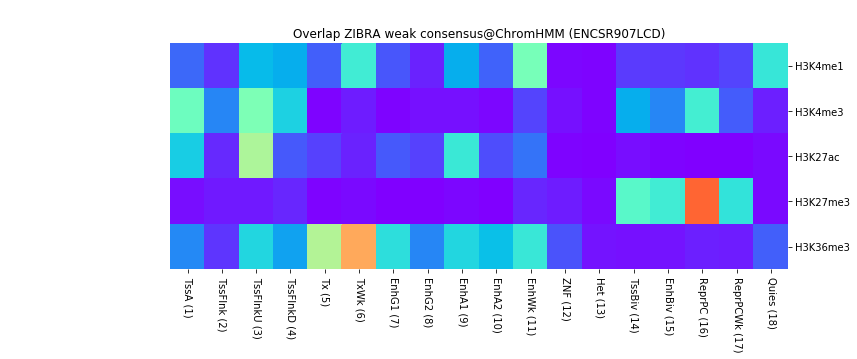

In [33]:
result_pdf_path = data_root / "reports/weak_span@heatmap_overlap_chromhmm.pdf"

build_overlap_metrics(
    result_pdf_path, 'Overlap SPAN weak consensus@{}'.format(chromhmm_title),
    zinbra_paths, hists, chromhmm_paths, chromhmm_labels, figsize=(18, 6))

# Golden

In [35]:
golden_paths = []
for h in hists:
    folder = "sicer" if h == "H3K36me3" else "macs_broad"
    golden_paths.append(data_root / "benchmark/{0}/{1}/consensus/{0}_{1}_weak_consensus.bed".format(h, folder))
golden_paths

[PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/benchmark/H3K4me1/macs_broad/consensus/H3K4me1_macs_broad_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/benchmark/H3K4me3/macs_broad/consensus/H3K4me3_macs_broad_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/benchmark/H3K27ac/macs_broad/consensus/H3K27ac_macs_broad_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/benchmark/H3K27me3/macs_broad/consensus/H3K27me3_macs_broad_weak_consensus.bed'),
 PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/benchmark/H3K36me3/sicer/consensus/H3K36me3_sicer_weak_consensus.bed')]

Calculating overlap metrics: /mnt/stripe/bio/experiments/configs/Y20O20/reports/heatmap_overlap_chromhmm@weak_golden.pdf


,H3K4me1_macs_broad_weak_consensus.bed,H3K4me3_macs_broad_weak_consensus.bed,H3K27ac_macs_broad_weak_consensus.bed,H3K27me3_macs_broad_weak_consensus.bed,H3K36me3_sicer_weak_consensus.bed
cd14_encsr907lcd_chromhmm18.hg19.1_TssA.bed,0.672430,0.817872,0.916961,0.000992,0.674785
cd14_encsr907lcd_chromhmm18.hg19.2_TssFlnk.bed,0.581967,0.475161,0.344511,0.006582,0.335072
cd14_encsr907lcd_chromhmm18.hg19.3_TssFlnkU.bed,0.965215,0.408447,0.825907,0.000592,0.713427
cd14_encsr907lcd_chromhmm18.hg19.4_TssFlnkD.bed,0.971358,0.161973,0.191829,0.002110,0.551066
cd14_encsr907lcd_chromhmm18.hg19.5_Tx.bed,0.202313,0.000307,0.041695,0.000307,0.992085


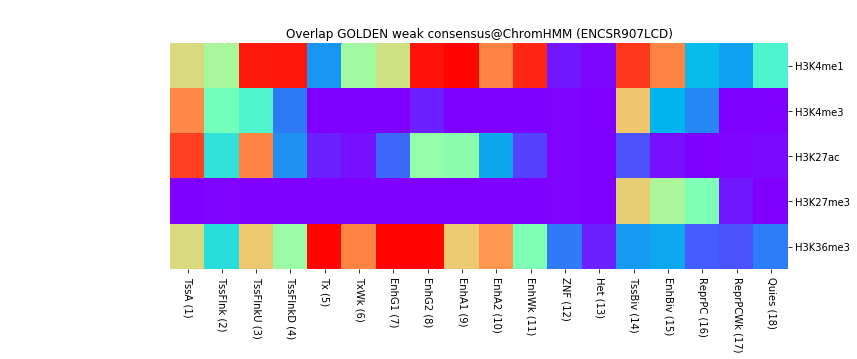

In [38]:
result_pdf_path = data_root / "reports/heatmap_overlap_chromhmm@weak_golden.pdf"

build_overlap_metrics(
    result_pdf_path, 'Overlap GOLDEN weak consensus@{}'.format(chromhmm_title),
    chromhmm_paths, chromhmm_labels, golden_paths, hists, 
    transpose=True, figsize=(18, 6))

Calculating overlap metrics: /mnt/stripe/bio/experiments/configs/Y20O20/reports/weak_golden@heatmap_overlap_chromhmm.pdf


,cd14_encsr907lcd_chromhmm18.hg19.1_TssA.bed,cd14_encsr907lcd_chromhmm18.hg19.2_TssFlnk.bed,cd14_encsr907lcd_chromhmm18.hg19.3_TssFlnkU.bed,cd14_encsr907lcd_chromhmm18.hg19.4_TssFlnkD.bed,cd14_encsr907lcd_chromhmm18.hg19.5_Tx.bed,cd14_encsr907lcd_chromhmm18.hg19.6_TxWk.bed,cd14_encsr907lcd_chromhmm18.hg19.7_EnhG1.bed,cd14_encsr907lcd_chromhmm18.hg19.8_EnhG2.bed,cd14_encsr907lcd_chromhmm18.hg19.9_EnhA1.bed,cd14_encsr907lcd_chromhmm18.hg19.10_EnhA2.bed,cd14_encsr907lcd_chromhmm18.hg19.11_EnhWk.bed,cd14_encsr907lcd_chromhmm18.hg19.12_ZNF_Rpts.bed,cd14_encsr907lcd_chromhmm18.hg19.13_Het.bed,cd14_encsr907lcd_chromhmm18.hg19.14_TssBiv.bed,cd14_encsr907lcd_chromhmm18.hg19.15_EnhBiv.bed,cd14_encsr907lcd_chromhmm18.hg19.16_ReprPC.bed,cd14_encsr907lcd_chromhmm18.hg19.17_ReprPCWk.bed,cd14_encsr907lcd_chromhmm18.hg19.18_Quies.bed
H3K4me1_macs_broad_weak_consensus.bed,0.089200,0.037639,0.264395,0.210693,0.073323,0.390551,0.099326,0.038449,0.216435,0.118652,0.458756,0.005649,0.004351,0.061990,0.061771,0.057893,0.073635,0.295205
H3K4me3_macs_broad_weak_consensus.bed,0.436829,0.144240,0.470875,0.179182,0.000488,0.001871,0.000366,0.010739,0.001261,0.001749,0.004068,0.005654,0.000773,0.224780,0.101774,0.324886,0.002807,0.005369
H3K27ac_macs_broad_weak_consensus.bed,0.293888,0.064586,0.635813,0.135602,0.048433,0.040963,0.077077,0.084572,0.417172,0.101121,0.158458,0.004279,0.000915,0.021174,0.004848,0.002053,0.004106,0.023796
H3K27me3_macs_broad_weak_consensus.bed,0.000712,0.002903,0.001534,0.003944,0.000822,0.000986,0.000110,0.000055,0.000000,0.000000,0.002246,0.011010,0.001534,0.287412,0.247590,0.898225,0.062007,0.003287
H3K36me3_sicer_weak_consensus.bed,0.320086,0.117576,0.493257,0.409093,0.471734,0.754995,0.256179,0.131282,0.414213,0.295536,0.584136,0.141520,0.078384,0.072439,0.073485,0.108659,0.158584,0.533330


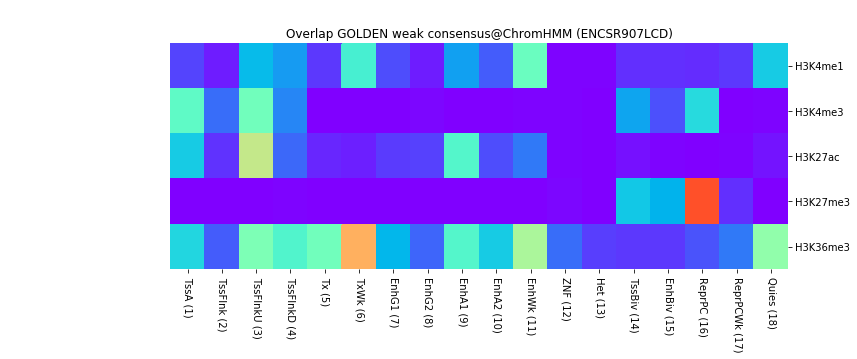

In [39]:
result_pdf_path = data_root / "reports/weak_golden@heatmap_overlap_chromhmm.pdf"

build_overlap_metrics(
    result_pdf_path, 'Overlap GOLDEN weak consensus@{}'.format(chromhmm_title),
    golden_paths, hists, chromhmm_paths, chromhmm_labels, figsize=(18, 6))

# Golden & Zinbra

In [13]:
tools_paths = []
tools_labels = []
for h in hists:
    for folder in ["zinbra", "sicer" if h == "H3K36me3" else "macs_broad"]:
        tools_paths.append(data_root / "benchmark/{0}/{1}/consensus/{0}_{1}_weak_consensus.bed".format(h, folder))
        tool = "MACS2" if folder == "macs_broad" else folder.upper()
        tools_labels.append("{}: {}".format(tool, h))

In [14]:
list(zip(tools_paths, tools_labels))

[(PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/benchmark/H3K4me1/zinbra/consensus/H3K4me1_zinbra_weak_consensus.bed'),
  'ZINBRA: H3K4me1'),
 (PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/benchmark/H3K4me1/macs_broad/consensus/H3K4me1_macs_broad_weak_consensus.bed'),
  'MACS2: H3K4me1'),
 (PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/benchmark/H3K4me3/zinbra/consensus/H3K4me3_zinbra_weak_consensus.bed'),
  'ZINBRA: H3K4me3'),
 (PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/benchmark/H3K4me3/macs_broad/consensus/H3K4me3_macs_broad_weak_consensus.bed'),
  'MACS2: H3K4me3'),
 (PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/benchmark/H3K27ac/zinbra/consensus/H3K27ac_zinbra_weak_consensus.bed'),
  'ZINBRA: H3K27ac'),
 (PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/benchmark/H3K27ac/macs_broad/consensus/H3K27ac_macs_broad_weak_consensus.bed'),
  'MACS2: H3K27ac'),
 (PosixPath('/mnt/stripe/bio/experiments/configs/Y20O20/benchmark/H3K27me3/zinb

Calculating overlap metrics: /mnt/stripe/bio/experiments/configs/Y20O20/reports/heatmap_overlap_chromhmm@weak_tools.pdf


,H3K4me1_zinbra_weak_consensus.bed,H3K4me1_macs_broad_weak_consensus.bed,H3K4me3_zinbra_weak_consensus.bed,H3K4me3_macs_broad_weak_consensus.bed,H3K27ac_zinbra_weak_consensus.bed,H3K27ac_macs_broad_weak_consensus.bed,H3K27me3_zinbra_weak_consensus.bed,H3K27me3_macs_broad_weak_consensus.bed,H3K36me3_zinbra_weak_consensus.bed,H3K36me3_sicer_weak_consensus.bed
cd14_encsr907lcd_chromhmm18.hg19.1_TssA.bed,0.909339,0.672430,0.827167,0.817872,0.894714,0.916961,0.014687,0.000992,0.308793,0.674785
cd14_encsr907lcd_chromhmm18.hg19.2_TssFlnk.bed,0.742424,0.581967,0.551416,0.475161,0.271610,0.344511,0.049305,0.006582,0.149404,0.335072
cd14_encsr907lcd_chromhmm18.hg19.3_TssFlnkU.bed,0.980047,0.965215,0.434683,0.408447,0.801024,0.825907,0.010325,0.000592,0.356989,0.713427
cd14_encsr907lcd_chromhmm18.hg19.4_TssFlnkD.bed,0.968961,0.971358,0.284436,0.161973,0.171467,0.191829,0.022856,0.002110,0.222741,0.551066
cd14_encsr907lcd_chromhmm18.hg19.5_Tx.bed,0.287179,0.202313,0.003400,0.000307,0.061511,0.041695,0.002146,0.000307,0.972324,0.992085


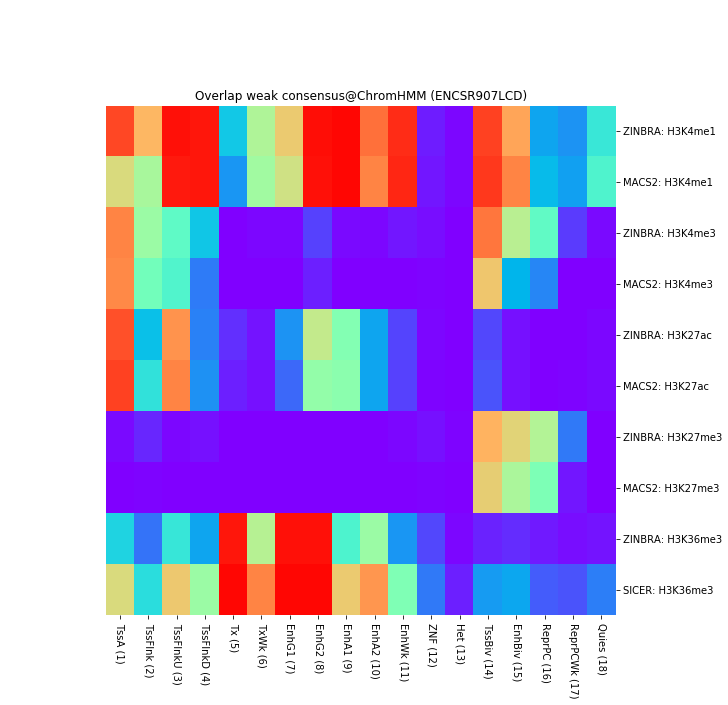

In [43]:
result_pdf_path = data_root / "reports/heatmap_overlap_chromhmm@weak_tools.pdf"

build_overlap_metrics(
    result_pdf_path, 'Overlap weak consensus@{}'.format(chromhmm_title),
    chromhmm_paths, chromhmm_labels, tools_paths, tools_labels, 
    transpose=True, figsize=(14, 14))